In [35]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [36]:
# Load data
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

data = pd.read_csv('TMNIST_data.csv')
print(data)


                                  names  labels  1  2  3  4  5  6  7  8  ...  \
0                    GrandHotel-Regular       2  0  0  0  0  0  0  0  0  ...   
1            EncodeSansCondensed-Medium       8  0  0  0  0  0  0  0  0  ...   
2                        Varela-Regular       4  0  0  0  0  0  0  0  0  ...   
3                        ArefRuqaa-Bold       3  0  0  0  0  0  0  0  0  ...   
4                     KulimPark-Regular       1  0  0  0  0  0  0  0  0  ...   
...                                 ...     ... .. .. .. .. .. .. .. ..  ...   
29895                     Raleway[wght]       7  0  0  0  0  0  0  0  0  ...   
29896                     Charm-Regular       5  0  0  0  0  0  0  0  0  ...   
29897  BigShouldersStencilDisplay-Black       0  0  0  0  0  0  0  0  0  ...   
29898                  Gabriela-Regular       1  0  0  0  0  0  0  0  0  ...   
29899                       Ovo-Regular       6  0  0  0  0  0  0  0  0  ...   

       775  776  777  778  779  780  78

number of unique fonts = 2990


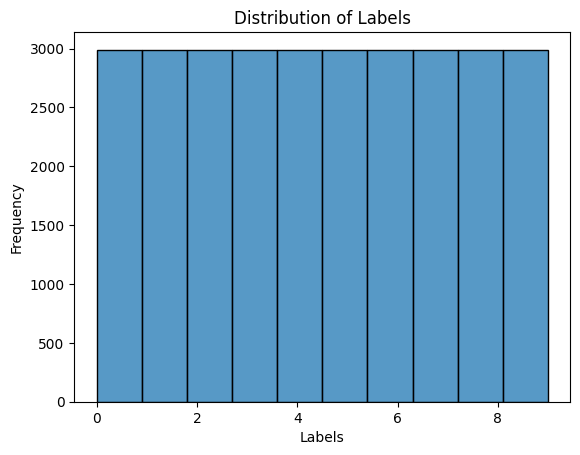

In [38]:
print("number of unique fonts =",data['names'].nunique())

sns.histplot(data['labels'], bins=10, kde=False)  # kde=False if you do not want the density estimate curve
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

With this we can see how the data is distributed.
We have 2990 fonts which make up 29900 different samples.
We can also see that we have 10 samples for each font meaning the numbers 0-9.
this means that the network we train will only see each type of number 1 time.

We should now seperate our data into training, test, and validation sets.
I will be using the 70,15,15 split.

- Training = 29,900 * 0.7 = 20,930
- Test = 29,900 * 0.15 = 4,485
- Validation = 29,900 * 0.15 = 4,485

We will need to be careful how we seperate this data, if we aren't careful we could end up inadvertantly removing a greater number of examples of a given number than we intend. for example, in the entire training set there are only 2990 examples of the number 0. if we seperate ~9000 examples for our test and validation sets, its possible that we could accidentaly take most of or all the 0 examples, meaning that we will get very poor performance since we would be testing the network on things it has never seen.

For this project I am going to seperate values out by font, this way we can test to see if our algorithm understands what the specific numbers look like and can generalizes well to fonts it's never seen. 

In [43]:
#lets sort our data by font names and double check tha we have 10 values for each font
data = data.sort_values(by='names')
print(data[:25])

                 names  labels  1  2  3  4  5  6  7  8  ...  775  776  777  \
6519    ABeeZee-Italic       3  0  0  0  0  0  0  0  0  ...    0    0    0   
16848   ABeeZee-Italic       2  0  0  0  0  0  0  0  0  ...    0    0    0   
20132   ABeeZee-Italic       1  0  0  0  0  0  0  0  0  ...    0    0    0   
10904   ABeeZee-Italic       4  0  0  0  0  0  0  0  0  ...    0    0    0   
2750    ABeeZee-Italic       8  0  0  0  0  0  0  0  0  ...    0    0    0   
10538   ABeeZee-Italic       7  0  0  0  0  0  0  0  0  ...    0    0    0   
13586   ABeeZee-Italic       0  0  0  0  0  0  0  0  0  ...    0    0    0   
15902   ABeeZee-Italic       6  0  0  0  0  0  0  0  0  ...    0    0    0   
22972   ABeeZee-Italic       5  0  0  0  0  0  0  0  0  ...    0    0    0   
29626   ABeeZee-Italic       9  0  0  0  0  0  0  0  0  ...    0    0    0   
19350  ABeeZee-Regular       3  0  0  0  0  0  0  0  0  ...    0    0    0   
3225   ABeeZee-Regular       5  0  0  0  0  0  0  0  0  ...    0

The data looks just like we expected it to. Now we can go ahead and pull out the number of fonts that we want for the test and validation sets.

- Test: 4,485/10 = 448.5
- Validation: 4,485/10 = 448.5

Since each font has 10 values we will round each set up to 450 fonts, we will do this just to keep the number of examples for each number the same.

In [44]:
#Lets pull our data into its training, test and validation sets
test_data = data.iloc[:4500]
validation_data = data.iloc[4500:9000]
training_data = data.iloc[9000:]

Now that we have our data figured out, lets build our visualizer.

In [39]:
# Define model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

c:\Users\yohas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


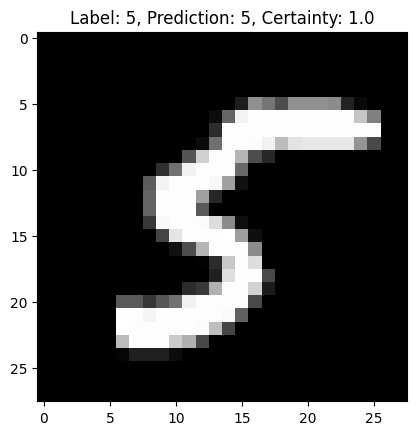

In [18]:
#show a random image with the lable and prediction in the title along with the cirtanty of the prediction 
def show_image():
    index = np.random.randint(0, x_test.shape[0])
    image = x_test[index]
    label = y_test[index]
    prediction = model.predict(np.array([image])).argmax()
    certainty = model.predict(np.array([image])).max()
    plt.title(f"Label: {label}, Prediction: {prediction}, Certainty: {certainty}")
    plt.imshow(image, cmap='gray')
    plt.show()
show_image()